# APIs and Data Fetching

## Overview

In this lab, you'll practice:
- Understanding APIs and HTTP requests
- Making GET and POST requests
- Working with JSON data
- Using financial APIs (yfinance, Alpha Vantage)
- Fetching real-time market data
- Web scraping with Pandas
- Sentiment analysis on financial news

**Important:** Complete your work and have it manually checked by your instructor.

---

## Part 1: Introduction to APIs

### What is an API?

**API (Application Programming Interface)** is a way for programs to communicate with each other. In finance, APIs let us:
- Fetch real-time stock prices
- Download historical market data
- Access company financials
- Get economic indicators
- Retrieve news and sentiment

### HTTP Methods:
- **GET**: Retrieve data (most common)
- **POST**: Send data to server
- **PUT**: Update existing data
- **DELETE**: Remove data

### Common Response Formats:
- **JSON**: JavaScript Object Notation (most common)
- **XML**: Extensible Markup Language
- **CSV**: Comma-Separated Values

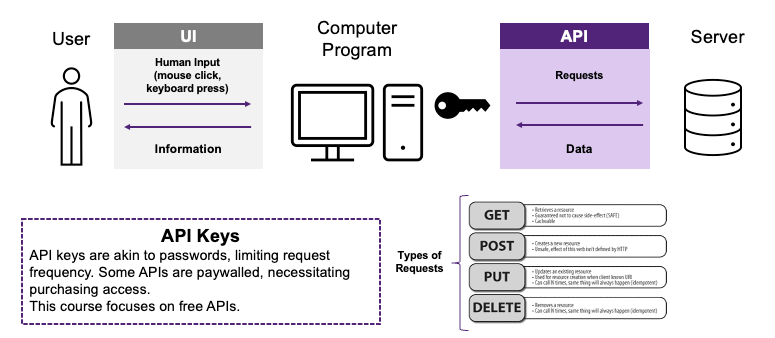
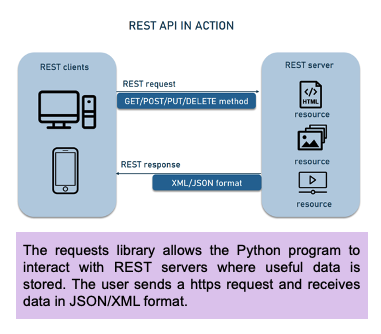

### Making Your First API Request

In [1]:
import requests

# Simple GET request to a public API
url = 'https://api.coindesk.com/v1/bpi/currentprice.json'
response = requests.get(url)

print(f"Status Code: {response.status_code}")  # 200 means success
print(f"Response Type: {type(response.text)}")
print(f"\nRaw Response (first 200 chars):")
print(response.text[:200])

ConnectionError: HTTPSConnectionPool(host='api.coindesk.com', port=443): Max retries exceeded with url: /v1/bpi/currentprice.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x785ca857f3b0>: Failed to resolve 'api.coindesk.com' ([Errno -2] Name or service not known)"))

### Working with JSON

In [ ]:
# Convert JSON response to Python dictionary
data = response.json()

print("Type:", type(data))
print("\nKeys:", data.keys())
print("\nBitcoin Price Data:")
print(data['bpi']['USD'])

In [ ]:
# Extract specific information
btc_price = data['bpi']['USD']['rate_float']
currency = data['bpi']['USD']['code']
timestamp = data['time']['updated']

print(f"Bitcoin Price: {currency} ${btc_price:,.2f}")
print(f"Last Updated: {timestamp}")

---

## Part 2: Weather API Example (Open Meteo)

Open Meteo provides free weather data without requiring an API key.

In [ ]:
import requests
import pandas as pd

# Coordinates for Sydney
latitude = -33.891228
longitude = 151.19585

# Construct API URL
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'

# Make request
response = requests.get(url)
data = response.json()

# Extract current weather
current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
print()

# Display as DataFrame
weather_df = pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])
print(weather_df)

### Interactive Weather Query

In [ ]:
def get_weather(latitude, longitude):
    """
    Fetch current weather for given coordinates.
    """
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true'
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise error for bad status codes
        
        data = response.json()
        weather = data['current_weather']
        
        print(f"Temperature: {weather['temperature']}°C")
        print(f"Wind Speed: {weather['windspeed']} km/h")
        print(f"Weather Code: {weather['weathercode']}")
        
        return weather
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather: {e}")
        return None

# Test with New York coordinates
weather = get_weather(40.7128, -74.0060)

---

## Part 3: Financial Data with yfinance

yfinance is a popular library for downloading financial data from Yahoo Finance.

### Installation

If you haven't installed yfinance yet:
```bash
pip install yfinance --break-system-packages
```

### Downloading Stock Data

In [ ]:
import yfinance as yf
import pandas as pd

# Download historical data for Microsoft
msft = yf.download(
    tickers='MSFT',
    start='2024-01-01',
    end='2024-12-31',
    progress=False
)

print("Microsoft Stock Data:")
print(msft.head())
print(f"\nShape: {msft.shape}")

### Analyzing Stock Data

In [ ]:
# Calculate returns
msft['Daily_Return'] = msft['Close'].pct_change() * 100

# Summary statistics
print("Summary Statistics:")
print(msft['Close'].describe())
print()

# Performance metrics
start_price = msft['Close'].iloc[0]
end_price = msft['Close'].iloc[-1]
total_return = ((end_price - start_price) / start_price) * 100

print(f"Start Price: ${start_price:.2f}")
print(f"End Price: ${end_price:.2f}")
print(f"Total Return: {total_return:.2f}%")

### Multiple Stocks

In [ ]:
# Download data for multiple stocks
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2024-01-01', end='2024-12-31', progress=False)

# Get closing prices only
close_prices = data['Close']

print("Closing Prices:")
print(close_prices.head())

# Calculate correlation
print("\nCorrelation Matrix:")
print(close_prices.corr())

### Getting Company Information

In [ ]:
# Get detailed company information
ticker = yf.Ticker('AAPL')

# Company info
info = ticker.info
print(f"Company: {info.get('longName', 'N/A')}")
print(f"Sector: {info.get('sector', 'N/A')}")
print(f"Industry: {info.get('industry', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,.0f}")
print(f"P/E Ratio: {info.get('trailingPE', 'N/A')}")
print(f"52 Week High: ${info.get('fiftyTwoWeekHigh', 0):.2f}")
print(f"52 Week Low: ${info.get('fiftyTwoWeekLow', 0):.2f}")

---

## Part 4: Web Scraping with Pandas

Pandas can read HTML tables directly from web pages.

### Scraping S&P 500 Components

In [ ]:
import pandas as pd

# Read S&P 500 list from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# read_html returns a list of DataFrames (one for each table)
tables = pd.read_html(url)

print(f"Number of tables found: {len(tables)}")
print(f"\nFirst table shape: {tables[0].shape}")

# The first table contains the S&P 500 companies
sp500 = tables[0]
print("\nS&P 500 Companies:")
print(sp500.head())

### Analyzing Scraped Data

In [ ]:
# Count companies by sector
sector_counts = sp500['GICS Sector'].value_counts()

print("Companies by Sector:")
print(sector_counts)

# Get all Technology sector companies
tech_companies = sp500[sp500['GICS Sector'] == 'Information Technology']
print(f"\nNumber of Tech Companies: {len(tech_companies)}")
print("\nTech Companies:")
print(tech_companies[['Symbol', 'Security', 'GICS Sub-Industry']].head(10))

### Scraping NASDAQ-100

In [ ]:
# Scrape NASDAQ-100 components
nasdaq_url = 'https://en.wikipedia.org/wiki/Nasdaq-100'
nasdaq_tables = pd.read_html(nasdaq_url)

print(f"Number of tables: {len(nasdaq_tables)}")

# Find the components table (usually contains 'Ticker' column)
for i, table in enumerate(nasdaq_tables):
    print(f"\nTable {i} columns: {table.columns.tolist()}")
    print(f"Table {i} shape: {table.shape}")

---

## Part 5: News API and Sentiment Analysis

**Note:** You'll need to sign up for a free API key at https://newsapi.org/

### Fetching Financial News

In [ ]:
import requests
from datetime import datetime, timedelta

# Note: Replace with your own API key from https://newsapi.org/
API_KEY = 'YOUR_API_KEY_HERE'  # Sign up for free at newsapi.org

# Search parameters
topic = 'Tesla'
today = datetime.now().strftime('%Y-%m-%d')
week_ago = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')

# API endpoint
url = f"https://newsapi.org/v2/everything?q={topic}&from={week_ago}&to={today}&sortBy=popularity&language=en&apiKey={API_KEY}"

try:
    response = requests.get(url, timeout=10)
    data = response.json()
    
    if response.status_code == 200:
        articles = data.get('articles', [])
        print(f"Found {len(articles)} articles about {topic}:\n")
        
        for i, article in enumerate(articles[:5], 1):
            print(f"{i}. {article['title']}")
            print(f"   Source: {article['source']['name']}")
            print(f"   Published: {article['publishedAt']}")
            print()
    else:
        print(f"Error: {data.get('message', 'Unknown error')}")
        
except Exception as e:
    print(f"Error: {e}")
    print("\nNote: You need to sign up for a free API key at https://newsapi.org/")

### Sentiment Analysis with TextBlob

**Installation:**
```bash
pip install textblob --break-system-packages
```

In [ ]:
try:
    from textblob import TextBlob
    import pandas as pd
    
    # Example headlines
    headlines = [
        "Tesla stock surges on strong earnings report",
        "Apple faces regulatory challenges in Europe",
        "Amazon reports record holiday sales",
        "Microsoft announces layoffs amid restructuring",
        "Google launches new AI product to compete with rivals"
    ]
    
    # Analyze sentiment
    results = []
    for headline in headlines:
        sentiment = TextBlob(headline).sentiment
        results.append({
            'headline': headline,
            'polarity': sentiment.polarity,  # -1 (negative) to 1 (positive)
            'subjectivity': sentiment.subjectivity  # 0 (objective) to 1 (subjective)
        })
    
    # Display results
    sentiment_df = pd.DataFrame(results)
    print("Sentiment Analysis:")
    print(sentiment_df)
    
    # Classify sentiment
    sentiment_df['sentiment'] = sentiment_df['polarity'].apply(
        lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
    )
    
    print("\nSentiment Classification:")
    print(sentiment_df[['headline', 'sentiment']])
    
except ImportError:
    print("TextBlob not installed. Install with: pip install textblob --break-system-packages")

---

## Programming Exercises

### Exercise 1: Cryptocurrency Tracker

Use the CoinDesk API to:
1. Fetch current Bitcoin price in USD, EUR, and GBP
2. Create a DataFrame with the prices
3. Calculate and display:
   - Price differences between currencies
   - Which currency has the highest/lowest price
4. Save the data to CSV with timestamp

**API URL:** `https://api.coindesk.com/v1/bpi/currentprice.json`

In [ ]:
# Exercise 1: Cryptocurrency Tracker
# Write your code here



### Exercise 2: Weather-Based Trading Signal

Create a function that:
1. Takes latitude and longitude as input
2. Fetches current weather data from Open Meteo
3. Returns a "trading signal" based on temperature:
   - Temperature > 25°C: "Hot weather - consider beverage stocks"
   - Temperature < 10°C: "Cold weather - consider heating/utility stocks"
   - Otherwise: "Moderate weather - balanced portfolio"
4. Test with at least 3 different cities

**Cities to test:**
- Sydney: (-33.891228, 151.19585)
- London: (51.5074, -0.1278)
- New York: (40.7128, -74.0060)

In [ ]:
# Exercise 2: Weather-Based Trading Signal
# Write your code here



### Exercise 3: Stock Data Downloader

Using yfinance, create a function that:
1. Takes a list of stock symbols and a date range
2. Downloads closing prices for all stocks
3. Calculates:
   - Total return for each stock
   - Average daily return
   - Volatility (standard deviation)
   - Sharpe ratio (assume risk-free rate = 2%)
4. Returns a summary DataFrame sorted by Sharpe ratio
5. Exports to CSV

**Test with:** ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']  
**Date range:** 2024-01-01 to 2024-12-31

In [ ]:
# Exercise 3: Stock Data Downloader
# Write your code here



### Exercise 4: Sector Analysis from Web Scraping

Scrape S&P 500 data from Wikipedia and:
1. Count companies by sector
2. Find the top 3 sectors by company count
3. For each top sector:
   - List all companies in that sector
   - Download YTD performance using yfinance
   - Calculate average sector performance
4. Create a comparison DataFrame
5. Export results to CSV

**Hint:** Use the first table from the Wikipedia page

In [ ]:
# Exercise 4: Sector Analysis
# Write your code here



### Exercise 5: Portfolio Optimizer

Create a portfolio analysis tool that:
1. Takes a dictionary of holdings: `{'AAPL': 100, 'GOOGL': 50, 'MSFT': 75}`
2. Downloads current prices using yfinance
3. Calculates:
   - Current portfolio value
   - Weight of each position
   - Download 1-year historical data
   - Calculate portfolio returns
   - Calculate portfolio volatility
   - Calculate correlation matrix
4. Generate a report with:
   - Position summary
   - Risk metrics
   - Diversification score
5. Export to CSV

In [ ]:
# Exercise 5: Portfolio Optimizer
# Write your code here



### Exercise 6: Real-Time Stock Monitor (Advanced)

Build a monitoring system that:
1. Takes a watchlist of stocks
2. Every 60 seconds (in a loop):
   - Fetches current price using yfinance
   - Compares to previous price
   - Displays: Symbol, Current Price, Change, % Change
   - Highlights stocks with >2% change
3. Runs for 5 minutes (5 iterations)
4. Saves all price updates to CSV

**Watchlist:** ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

**Note:** Use `time.sleep(60)` to wait between iterations

In [ ]:
# Exercise 6: Real-Time Stock Monitor
# Write your code here



### Exercise 7: News Sentiment Tracker (Advanced)

**Note:** Requires News API key and TextBlob

Create a sentiment analysis tool that:
1. Takes a company name (e.g., "Tesla")
2. Fetches last 20 news articles
3. Analyzes sentiment of each headline
4. Calculates:
   - Average sentiment score
   - Percentage positive/negative/neutral
   - Most positive headline
   - Most negative headline
5. Creates a summary DataFrame
6. Exports to CSV with timestamp

**Sentiment classification:**
- Positive: polarity > 0.1
- Negative: polarity < -0.1
- Neutral: -0.1 ≤ polarity ≤ 0.1

In [ ]:
# Exercise 7: News Sentiment Tracker
# Write your code here



### Exercise 8: Multi-Source Data Aggregator (Advanced)

Build a comprehensive stock analyzer that combines:
1. **Price data** (yfinance): Current price, 52-week high/low
2. **Company info** (yfinance): Sector, market cap, P/E ratio
3. **Index membership** (web scraping): Check if in S&P 500
4. **News sentiment** (News API + TextBlob): Overall sentiment

Create a function `analyze_stock(symbol)` that:
- Fetches all the above data
- Generates a comprehensive report
- Returns a dictionary with all metrics
- Provides a recommendation: BUY, HOLD, or SELL based on:
  - Positive sentiment + Price near 52-week low = BUY
  - Negative sentiment + Price near 52-week high = SELL
  - Otherwise = HOLD

Test with at least 3 stocks and create a comparison table.

In [ ]:
# Exercise 8: Multi-Source Data Aggregator
# Write your code here



---

## Summary: Key Concepts

### Making API Requests:
```python
import requests

# GET request
response = requests.get(url, timeout=10)
data = response.json()

# Check status
if response.status_code == 200:
    # Success
    pass
```

### Error Handling:
```python
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")
```

### Financial Data (yfinance):
```python
import yfinance as yf

# Download data
data = yf.download('AAPL', start='2024-01-01', end='2024-12-31')

# Get company info
ticker = yf.Ticker('AAPL')
info = ticker.info
```

### Web Scraping:
```python
import pandas as pd

# Read tables from web page
tables = pd.read_html(url)
df = tables[0]  # First table
```

### Sentiment Analysis:
```python
from textblob import TextBlob

text = "Stock prices are rising"
sentiment = TextBlob(text).sentiment
polarity = sentiment.polarity  # -1 to 1
```

### Best Practices:
1. **Always use timeouts** in requests
2. **Handle errors gracefully** with try-except
3. **Respect rate limits** - add delays between requests
4. **Cache data** when possible
5. **Use API keys securely** - don't hardcode in scripts
6. **Validate data** before processing
7. **Log API calls** for debugging

---

## Testing and Submission

**Before moving on:**
1. Test all API calls with proper error handling
2. Understand rate limits and quotas
3. Know the difference between free and paid APIs
4. Practice combining multiple data sources
5. Export results to CSV/DataFrame
6. Have your instructor manually check your work

**Excellent work completing Lab 9!** 🎉